<a href="https://colab.research.google.com/github/ItsUditChauhan/Covid-Economy/blob/main/corona_stock_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime
%matplotlib inline
start= datetime(2020,1,1)
end= datetime.now()
prices = DataReader('%5ENSEI','yahoo',start,end)
prices.head(-3)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000
2020-01-02,12289.900391,12195.250000,12198.549805,12282.200195,407700.0,12282.200195
2020-01-03,12265.599609,12191.349609,12261.099609,12226.650391,428800.0,12226.650391
2020-01-06,12179.099609,11974.200195,12170.599609,11993.049805,396500.0,11993.049805
2020-01-07,12152.150391,12005.349609,12079.099609,12052.950195,447800.0,12052.950195
...,...,...,...,...,...,...
2021-04-08,14984.150391,14821.099609,14875.650391,14873.799805,514800.0,14873.799805
2021-04-09,14918.450195,14785.650391,14882.650391,14834.849609,504100.0,14834.849609
2021-04-12,14652.500000,14248.700195,14644.650391,14310.799805,650200.0,14310.799805


In [2]:
print(prices.axes)


[DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-12', '2021-04-13', '2021-04-15', '2021-04-16',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='Date', length=322, freq=None), Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')]


In [3]:
closing_price= prices['Adj Close']


In [4]:
closing_price.head(-5)

Date
2020-01-01    12182.500000
2020-01-02    12282.200195
2020-01-03    12226.650391
2020-01-06    11993.049805
2020-01-07    12052.950195
                  ...     
2021-04-06    14683.500000
2021-04-07    14819.049805
2021-04-08    14873.799805
2021-04-09    14834.849609
2021-04-12    14310.799805
Name: Adj Close, Length: 317, dtype: float64

In [5]:
closing_price= prices['Adj Close']
closing_price= closing_price.to_frame()
closing_price.rename(columns={"":"Adj Close"})
closing_price['returns'] = closing_price['Adj Close'].pct_change()
closing_price = closing_price.dropna()

In [6]:
closing_price.axes

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
                '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
                '2020-01-14', '2020-01-15',
                ...
                '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
                '2021-04-12', '2021-04-13', '2021-04-15', '2021-04-16',
                '2021-04-19', '2021-04-20'],
               dtype='datetime64[ns]', name='Date', length=321, freq=None),
 Index(['Adj Close', 'returns'], dtype='object')]

In [7]:
closing_price.head()

,Adj Close,returns
Date,,
2020-01-02,12282.200195,0.008184
2020-01-03,12226.650391,-0.004523
2020-01-06,11993.049805,-0.019106
2020-01-07,12052.950195,0.004995
2020-01-08,12025.349609,-0.002290


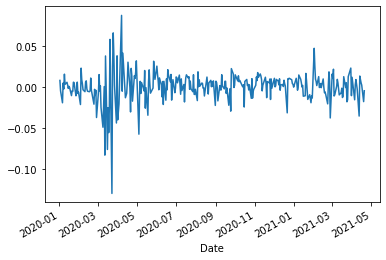

In [8]:
closing_price['returns'].plot()

In [9]:
#This will give the measure of risk or std deviation
closing_price['returns'].std()

0.018561360546760965

In [10]:
nifty_price = DataReader('%5ENSEI','yahoo',start,end)
nift_price=nifty_price[['Adj Close']]
nift_price['returns'] = nift_price['Adj Close'].pct_change()
nift_price = nift_price.dropna()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



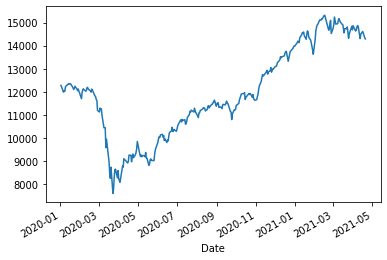

In [11]:
nift_price['Adj Close'].plot()

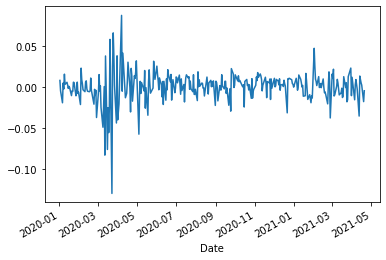

In [12]:
nift_price['returns'].plot()

### Computing Returns

In [13]:
#total return for first period under consideration 1st jan- 31st May
returns_first = nift_price['2020-01-01':'2020-05-31']['returns']
(returns_first+1).prod()-1

-0.21360149356146052

In [14]:
returns_first.std()

0.028617466125162444

In [15]:
#total return for second period 1st May till 15 jan
returns_sec = nift_price['2020-05-01':'2021-01-15']['returns']
(returns_sec+1).prod()-1

0.46387890581900293

In [16]:
returns_sec.std()

0.0116200944835637

In [17]:
#total return for third period  
returns_third = nift_price['2021-01-16':]['returns']
(returns_third+1).prod()-1

-0.009512446762063531

In [18]:
returns_third.std()

0.014399143989834827

### Compute Drawdown

In [19]:
nift_price.head()

,Adj Close,returns
Date,,
2020-01-02,12282.200195,0.008184
2020-01-03,12226.650391,-0.004523
2020-01-06,11993.049805,-0.019106
2020-01-07,12052.950195,0.004995
2020-01-08,12025.349609,-0.002290


In [20]:
wealth_index = 1000*(1+nift_price['returns']).cumprod()
wealth_index.head()

Date
2020-01-02    1008.183886
2020-01-03    1003.624083
2020-01-06     984.448989
2020-01-07     989.365910
2020-01-08     987.100317
Name: returns, dtype: float64

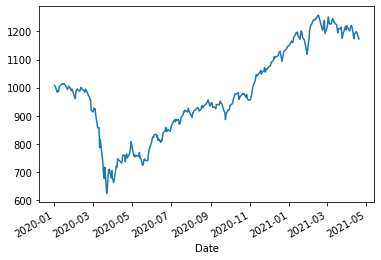

In [21]:
wealth_index.plot.line()

In [22]:
previous_peaks = wealth_index.cummax()

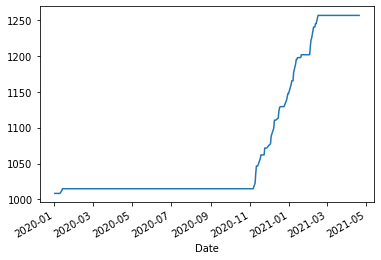

In [23]:
previous_peaks.plot.line()

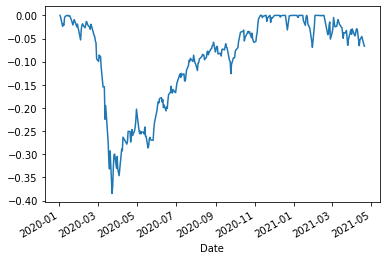

In [24]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [25]:
#drawdown.min() would give the max loss incurred
drawdown.min()

-0.38439852452742057

In [26]:
drawdown.idxmin()

Timestamp('2020-03-23 00:00:00')

In [27]:
def drawdown(return_series:pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a dataframe that contains:
    the wealth index
    the previous peaks
    the percentage drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth":wealth_index,
        "Peaks":previous_peaks,
        "Drawdown":drawdowns
    })

In [28]:
drawdown(nift_price['returns'])

,Wealth,Peaks,Drawdown
Date,,,
2020-01-02,1008.183886,1008.183886,0.000000
2020-01-03,1003.624083,1008.183886,-0.004523
2020-01-06,984.448989,1008.183886,-0.023542
2020-01-07,989.365910,1008.183886,-0.018665
2020-01-08,987.100317,1008.183886,-0.020912
...,...,...,...
2021-04-13,1190.625882,1257.106521,-0.052884
2021-04-15,1196.917726,1257.106521,-0.047879
2021-04-16,1199.905570,1257.106521,-0.045502


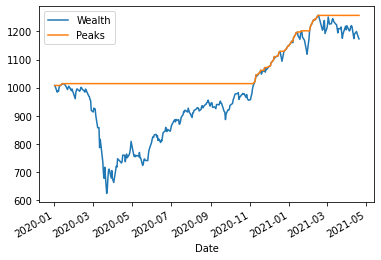

In [29]:
drawdown(nift_price['returns'])[['Wealth','Peaks']].plot()

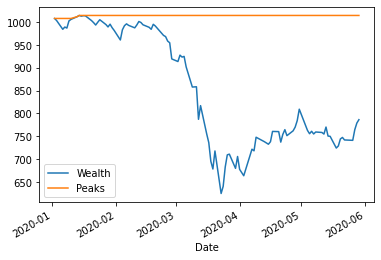

In [30]:
#1st period
drawdown(nift_price[:'2020-05-31']['returns'])[['Wealth','Peaks']].plot()

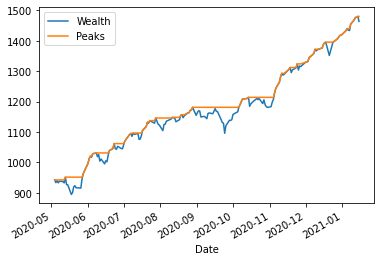

In [31]:
#2nd period
drawdown(nift_price['2020-05-01':'2021-01-15']['returns'])[['Wealth','Peaks']].plot()


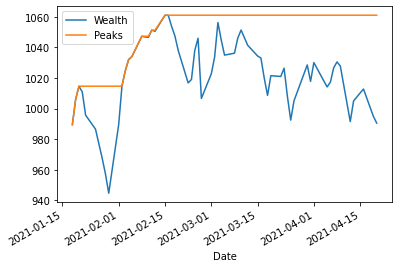

In [32]:

drawdown(nift_price['2021-01-16':]['returns'])[['Wealth','Peaks']].plot()

### COVID total confirmed cases in India

In [33]:
covid_data = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')
covid_data= covid_data.rename(columns={"Date_YMD": "Date", "Date": "Date_str"})
covid_data= covid_data.drop(['Date_str'], axis=1)

In [34]:
covid_data.head(-10)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
432,2021-04-06,115312,12799718,59714,11789610,630,165617
433,2021-04-07,126276,12925994,59137,11848747,684,166301
434,2021-04-08,131878,13057872,61829,11910576,802,167103
435,2021-04-09,144945,13202817,77263,11987839,773,167876


In [35]:
!pip install pywaffle

     |████████████████████████████████| 532kB 5.6MB/s 


In [36]:

import numpy as np 
import pandas as pd 


# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'


No Show graphs

In [37]:
# Rise in COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_data['Date'], y=covid_data['Total Confirmed'],mode='lines+markers',name='Total Cases'))  
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)',plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [38]:
import plotly.express as px
fig = px.bar(covid_data, x="Date", y="Total Confirmed", color='Total Confirmed', orientation='v', height=600,
              color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

Hardwork pays off!

In [39]:
covid_data["Date"] = pd.to_datetime(covid_data["Date"])
covid_data.set_index("Date", inplace= True)
covid_data.head()
covid_data.axes

[DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
                '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
                '2020-02-07', '2020-02-08',
                ...
                '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
                '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
                '2021-04-19', '2021-04-20'],
               dtype='datetime64[ns]', name='Date', length=447, freq=None),
 Index(['Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
        'Total Recovered', 'Daily Deceased', 'Total Deceased'],
       dtype='object')]

In [40]:

new = pd.merge(closing_price, covid_data, on='Date')

new=new.reset_index(drop=False)
#new.head(60)

In [41]:
new.head(-60)

,Date,Adj Close,returns,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,12035.799805,-0.007725,1,1,0,0,0,0
1,2020-01-31,11962.099609,-0.006123,0,1,0,0,0,0
2,2020-02-03,11707.900391,-0.021250,1,3,0,0,0,0
3,2020-02-04,11979.650391,0.023211,0,3,0,0,0,0
4,2020-02-05,12089.150391,0.009141,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...
236,2021-01-13,14564.849609,0.000096,17015,10512755,17797,10146102,201,151174
237,2021-01-14,14595.599609,0.002111,15677,10528432,15943,10162045,189,151363
238,2021-01-15,14433.700195,-0.011092,15155,10543587,16809,10178854,176,151539
239,2021-01-18,14281.299805,-0.010559,9987,10582586,17127,10227696,137,152002


In [42]:
#period 1
column_1 = new[:78]["Adj Close"]
column_2 = new[:78]["Total Confirmed"]
column_3 = new[:78]["Daily Confirmed"]
print("Corr b/w Close & Total Confirmed ", column_1.corr(column_2)," Corr b/w Close & Daily Confirmed ",column_1.corr(column_3))

Corr b/w Close & Total Confirmed  -0.3442177949809436  Corr b/w Close & Daily Confirmed  -0.39154297691102347


In [43]:
#period 2
column_1 = new[78:238]["Adj Close"]
column_2 = new[78:238]["Total Confirmed"]
column_3 = new[78:238]["Daily Confirmed"]
print("Corr b/w Close & Total Confirmed ", column_1.corr(column_2)," Corr b/w Close & Daily Confirmed ",column_1.corr(column_3))

Corr b/w Close & Total Confirmed  0.9135988921140169  Corr b/w Close & Daily Confirmed  -0.09448737949673598


In [44]:
#period 3
column_1 = new[239:]["Adj Close"]
column_2 = new[239:]["Total Confirmed"]
column_3 = new[239:]["Daily Confirmed"]
print("Corr b/w Close & Total Confirmed ", column_1.corr(column_2)," Corr b/w Close & Daily Confirmed ",column_1.corr(column_3))

Corr b/w Close & Total Confirmed  -0.1931723230590059  Corr b/w Close & Daily Confirmed  -0.26397766579669485


### Reading NIFTY Industry Data 

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
nifty_auto = pd.read_csv('drive/MyDrive/sectors/nifty_auto.csv')
nifty_auto['Date']=pd.to_datetime(nifty_auto['Date'])
nifty_auto['Date']=pd.to_datetime(nifty_auto['Date']).dt.strftime('%d-%m-%Y')
nifty_auto = nifty_auto.drop(['Open','High','Low','Shares Traded','Turnover (Rs. Cr)'], axis=1)
nifty_auto.rename(columns = {'Close':'Nifty_Auto'}, inplace=True)
nifty_auto['nifty_auto_returns']=nifty_auto['Nifty_Auto'].pct_change()
nifty_auto=nifty_auto.dropna()
nifty_auto["Date"] = pd.to_datetime(nifty_auto["Date"])
nifty_auto.set_index("Date", inplace= True)
nifty_auto.head()

,Nifty_Auto,nifty_auto_returns
Date,,
2020-02-01,8267.45,0.006985
2020-03-01,8168.15,-0.012011
2020-06-01,7978.75,-0.023188
2020-07-01,8002.50,0.002977
2020-08-01,7942.75,-0.007466


In [47]:
new_df = pd.merge(new, nifty_auto, on='Date')
new_df.head()

,Date,Adj Close,returns,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Nifty_Auto,nifty_auto_returns
0,2020-01-30,12035.799805,-0.007725,1,1,0,0,0,0,8181.45,-0.004738
1,2020-01-31,11962.099609,-0.006123,0,1,0,0,0,0,8086.55,-0.011599
2,2020-02-03,11707.900391,-0.021250,1,3,0,0,0,0,6856.90,-0.006815
3,2020-02-06,12137.950195,0.004037,0,3,0,0,0,0,6471.30,0.008069
4,2020-02-07,12098.349609,-0.003263,0,3,0,0,0,0,6907.10,0.028056


In [48]:
#Created a function for ease of execution
def readdata(path):
    df = pd.read_csv(path)
    df['Date']=pd.to_datetime(df['Date'])
    df['Date']=pd.to_datetime(df['Date']).dt.strftime('%d-%m-%Y')
    df = df.drop(['Open','High','Low','Shares Traded','Turnover (Rs. Cr)'], axis=1)
    string_name = (path.split('/')[-1]).split('.')[0]
    df.rename(columns = {'Close':string_name}, inplace=True)
    df['returns']= df[string_name].pct_change()
    return_name = string_name+'_returns'
    df.rename(columns = {'returns':return_name}, inplace=True)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace= True)
    df=df.dropna()
    return df

In [49]:
#Testing my function
gh = readdata('drive/MyDrive/sectors/nifty_financialservices.csv')
new_df = pd.merge(new_df, gh, on='Date')
new_df.head()

,Date,Adj Close,returns,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Nifty_Auto,nifty_auto_returns,nifty_financialservices,nifty_financialservices_returns
0,2020-01-30,12035.799805,-0.007725,1,1,0,0,0,0,8181.45,-0.004738,14289.95,-0.003963
1,2020-01-31,11962.099609,-0.006123,0,1,0,0,0,0,8086.55,-0.011599,14316.90,0.001886
2,2020-02-03,11707.900391,-0.021250,1,3,0,0,0,0,6856.90,-0.006815,13520.00,-0.003424
3,2020-02-06,12137.950195,0.004037,0,3,0,0,0,0,6471.30,0.008069,10187.95,0.031848
4,2020-02-07,12098.349609,-0.003263,0,3,0,0,0,0,6907.10,0.028056,10906.75,0.005856


In [50]:
#Automating the first set of industry indices dataset creation (second set in next code-cell)
names = ['nifty_bank.csv','nifty_commodity.csv','nifty_fmcg.csv','nifty_metal.csv','nifty_pharma.csv']
for name in names:
    reading = 'drive/MyDrive/sectors/'+name
    some = readdata(reading)
    new_df = pd.merge(new_df,some,on='Date')

In [51]:
names = ['nifty_it.csv','nifty_services.csv','nifty_energy.csv','nifty_infra.csv','nifty_realty.csv','nifty_media.csv']
for name in names:
    reading = 'drive/MyDrive/sectors/'+name
    some = readdata(reading)
    new_df = pd.merge(new_df,some,on='Date')

In [52]:
new_df.head()

,Date,Adj Close,returns,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Nifty_Auto,nifty_auto_returns,nifty_financialservices,nifty_financialservices_returns,nifty_bank,nifty_bank_returns,nifty_commodity,nifty_commodity_returns,nifty_fmcg,nifty_fmcg_returns,nifty_metal,nifty_metal_returns,nifty_pharma,nifty_pharma_returns,nifty_it,nifty_it_returns,nifty_services,nifty_services_returns,nifty_energy,nifty_energy_returns,nifty_infra,nifty_infra_returns,nifty_realty,nifty_realty_returns,nifty_media,nifty_media_returns
0,2020-02-03,11707.900391,-0.021250,1,3,0,0,0,0,6856.90,-0.006815,13520.00,-0.003424,28868.40,-0.009564,16398.11,-0.002686,29138.90,-0.005846,2197.6,-0.021571,7535.10,-0.005497,15427.65,0.014113,13520.00,-0.003424,13419.05,-0.016991,2972.35,-0.012918,279.65,-0.003208,1594.70,-0.045490
1,2020-02-06,12137.950195,0.004037,0,3,0,0,0,0,6471.30,0.008069,10187.95,0.031848,20530.20,0.028572,13500.78,0.022264,29359.85,-0.007151,1956.1,0.001844,9833.60,0.003214,14422.40,0.008059,10187.95,0.031848,13479.90,0.010063,2912.45,0.009200,194.75,0.049300,1259.40,0.032845
2,2020-02-07,12098.349609,-0.003263,0,3,0,0,0,0,6907.10,0.028056,10906.75,0.005856,21953.20,-0.001110,13489.16,0.022026,30316.20,0.002769,2017.0,0.009838,9943.65,0.006152,15122.55,0.026503,10906.75,0.005856,14625.20,0.010422,3059.50,0.009270,201.05,-0.000746,1373.15,0.004021
3,2020-02-11,12107.900391,0.006350,0,3,0,0,0,0,7732.25,-0.003371,12089.05,0.038931,24892.50,0.041488,15893.37,0.007740,29441.45,0.000442,2338.9,-0.002005,11175.30,-0.006088,20732.30,-0.008823,12089.05,0.038931,14606.10,-0.024817,3098.70,-0.009889,235.40,0.031551,1417.90,-0.000810
4,2020-02-12,12201.200195,0.007706,0,3,0,0,0,0,9093.70,0.011856,14187.50,-0.011465,29463.15,-0.011896,18076.99,0.015586,31820.25,0.003627,3050.2,0.025605,12088.60,0.003607,22319.00,0.006682,14187.50,-0.011465,16701.05,0.013699,3501.80,0.007176,277.90,0.029641,1538.80,0.005160


In [53]:
#Cumulative returns
Automobile = (1 + new_df['nifty_auto_returns']).prod() - 1
Financial_Services = (1+new_df['nifty_financialservices_returns']).prod()-1
Bank =  (1 + new_df['nifty_bank_returns']).prod()-1
Commodity = (1 + new_df['nifty_commodity_returns']).prod()-1
FMCG = (1 + new_df['nifty_fmcg_returns']).prod()-1
Metal = (1 + new_df['nifty_metal_returns']).prod()-1
Pharma = (1 + new_df['nifty_pharma_returns']).prod()-1
IT = (1 + new_df['nifty_it_returns']).prod()-1
Services_Sector = (1 + new_df['nifty_services_returns']).prod()-1
Energy = (1 + new_df['nifty_energy_returns']).prod()-1
Infra = (1 + new_df['nifty_infra_returns']).prod()-1
Realty = (1 + new_df['nifty_realty_returns']).prod()-1
Media = (1 + new_df['nifty_media_returns']).prod()-1

In [54]:
#Calculating risk/volatility
Automobile_std = new_df['nifty_auto_returns'].std()
Financial_Services_std = new_df['nifty_financialservices_returns'].std()
Bank_std = new_df['nifty_bank_returns'].std()
Commodity_std = new_df['nifty_commodity_returns'].std()
FMCG_std = new_df['nifty_fmcg_returns'].std()
Metal_std = new_df['nifty_metal_returns'].std()
Pharma_std = new_df['nifty_pharma_returns'].std()
IT_std = new_df['nifty_it_returns'].std()
Services_Sector_std = new_df['nifty_services_returns'].std()
Energy_std = new_df['nifty_energy_returns'].std()
Infra_std = new_df['nifty_infra_returns'].std()
Realty_std = new_df['nifty_realty_returns'].std()
Media_std = new_df['nifty_media_returns'].std()

In [55]:
x_val = ['Automobile','Financial_Services','Bank','Commodity','FMCG','Metal','Pharma','IT','Services_Sector','Energy','Infra','Realty','Media']
y_val = [Automobile,Financial_Services,Bank,Commodity,FMCG,Metal,Pharma,IT,Services_Sector,Energy,Infra,Realty,Media]

In [56]:
y_val_risk_adjusted = [Automobile/Automobile_std,Financial_Services/Financial_Services_std, Bank/Bank_std, Commodity/Commodity_std, FMCG/FMCG_std, Metal/Metal_std, Pharma/Pharma_std, IT/IT_std, Services_Sector/Services_Sector_std, Energy/Energy_std, Infra/Infra_std, Realty/Realty_std, Media/Media_std]

In [57]:


fig = go.Figure(data=[
    go.Bar(name='Raw Returns', x=x_val, y=y_val),
    go.Bar(name='Risk Adjusted Return', x=x_val, y=y_val_risk_adjusted)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [58]:
fig = px.bar( x=y_val, y=x_val, color=y_val, orientation='h', height=600,
             title='Returns of industry indices', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [59]:
y_volatility = [Automobile_std,Financial_Services_std,Bank_std,Commodity_std,FMCG_std,Metal_std,Pharma_std,IT_std,Services_Sector_std,Energy_std,Infra_std,Realty_std,Media_std]

fig = px.bar( x=y_volatility, y=x_val, color=y_volatility, orientation='h', height=600,
             title='Volatility/Risk of industry indices', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [60]:
fig = px.bar( x=y_val_risk_adjusted, y=x_val, color=y_val_risk_adjusted, orientation='h', height=600,
             title='Risk adjusted returns of industry indices', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [61]:
fig = px.bar( x=x_val, y=y_val, color=y_val, orientation='v', height=600,
             title='Returns of industry indices', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


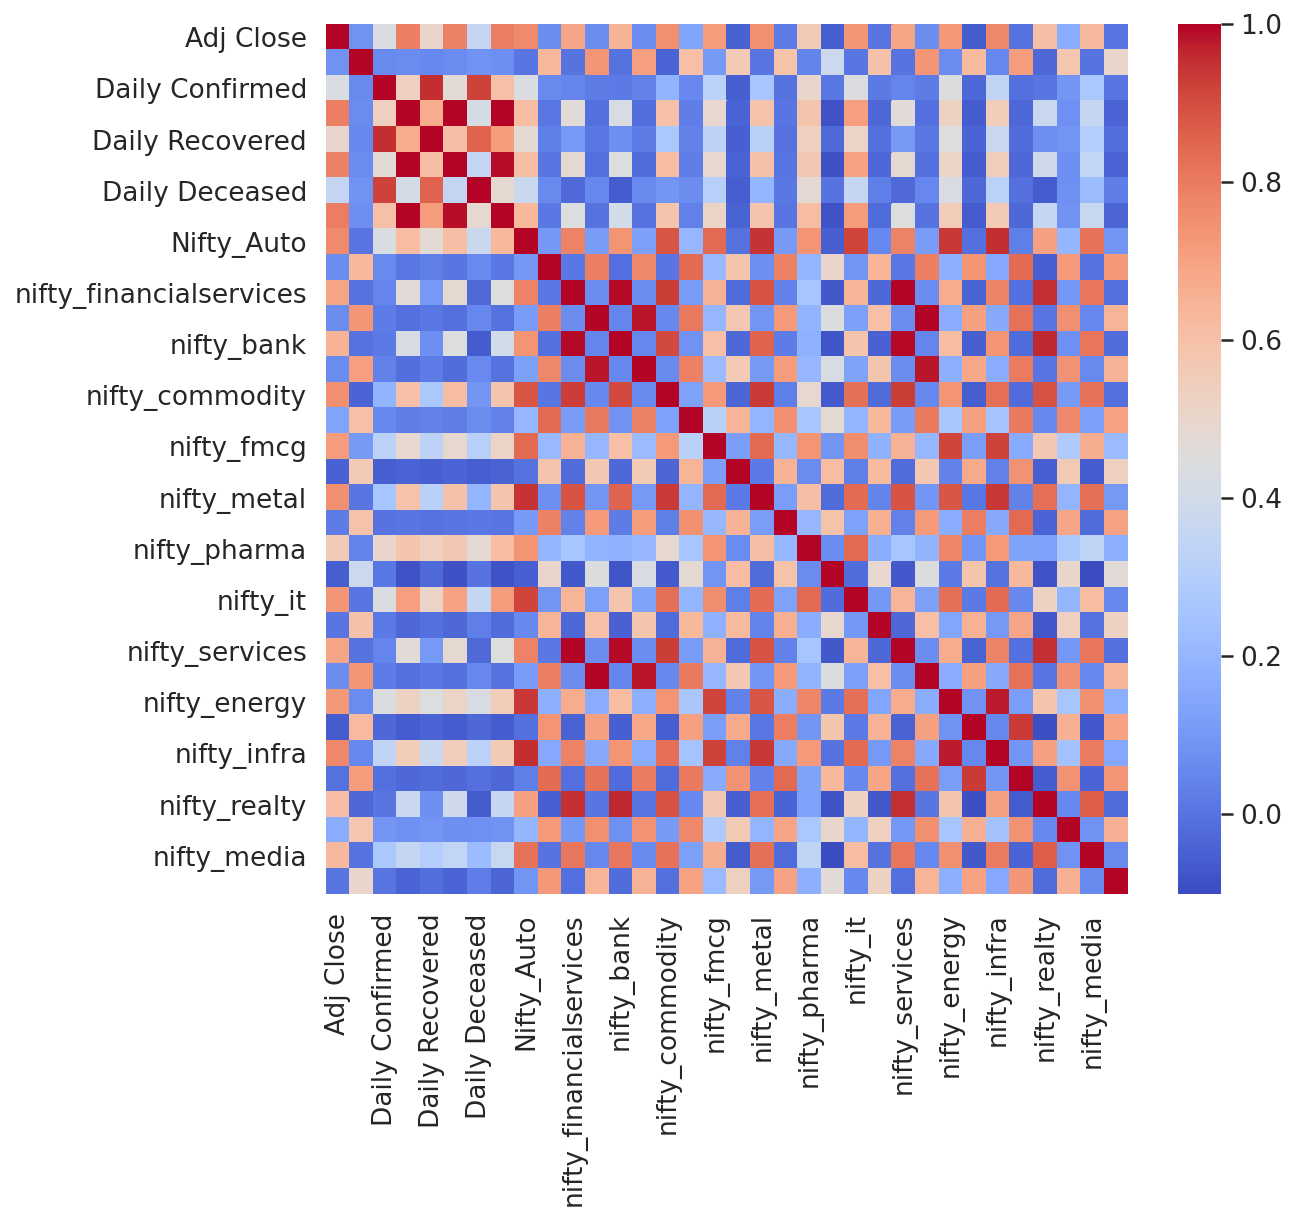

In [80]:
new_df_corr= new_df.dropna().corr()
plt.figure(figsize=(8, 8))
sns.heatmap(new_df_corr,  cmap= 'coolwarm')
plt.show()

In [82]:
#used to export data to excel file
new_df_corr.to_excel('drive/MyDrive/HU.xlsx')

In [72]:
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [73]:

new_df.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")